In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from pathlib import Path

In [21]:
df = pd.read_csv('./train.csv')
pokemons = np.unique(df['NameOfPokemon'])

In [22]:
pokemon_map = {}
for i,pokemon in enumerate(pokemons):
    pokemon_map[pokemon] = i

print(pokemon_map)

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}


In [34]:
image_data = []
labels = []

for pokemon in pokemons:
    images = df[df['NameOfPokemon']==pokemon]['ImageId'].values
    for i in images:
        path = Path('./Images/'+i)
        img = image.load_img(path,target_size=(40,40))
        img = image.img_to_array(img)
        image_data.append(img)
        labels.append(pokemon_map[pokemon])

image_data = np.array(image_data)
labels = np.array(labels)

In [40]:
m = image_data.shape[0]
image_data = image_data.reshape((m,-1))
labels = labels.reshape((-1,1))

#print(image_data.shape,labels.shape)

data = np.concatenate((image_data,labels),axis=1)
np.random.shuffle(data)
image_data = data[:,:-1]
labels = data[:,-1]

In [48]:
labels = labels.astype('int32')

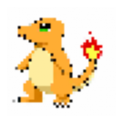

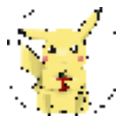

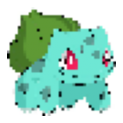

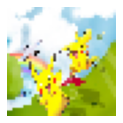

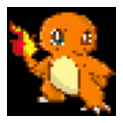

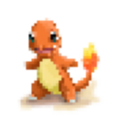

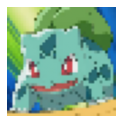

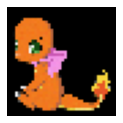

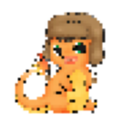

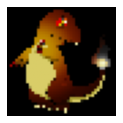

In [42]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(image_data[i].reshape((40,40,3))/255.0)
    plt.axis('off')
    plt.show()

In [43]:
class SVM:
    
    def __init__(self,c=1.0):
        self.c = c
        self.b = 0
        self.w = 0
    
    def hingeLoss(self,w,b,X,Y):
        w2 = np.dot(w,w)/2.0
        fx = Y*(np.dot(X,w) + b)
        l = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            if(fx[i] < 1):
                 l[i] = self.c*(1-fx[i])
        
        return (w2 + np.sum(l))
    
    def fit(self,X,Y,batch_size=100,learning_rate =0.001,max_iters=300):
        c = self.c
        n = learning_rate
        n_samples,n_features = X.shape

        losses = []
        
        w = np.zeros(n_features)
        b = 0
        
        for k in range(max_iters):
            loss = self.hingeLoss(w,b,X,Y) 
            losses.append(loss)
            
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            
            for batch_start in range(0,n_samples,batch_size):
                gradw = 0
                gradb = 0
                for j in range(batch_start,batch_start+batch_size):
                    if j < n_samples:
                        i = idx[j]
                        fx = (X[i].dot(w) + b)
                        if Y[i]*fx < 1:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]  
                w = w - n*w + n*gradw
                b = b + n*gradb
            
        losses = np.array(losses)
        self.b = b
        self.w = w
        return losses,w,b

In [55]:
class_data = {}
classes = np.unique(labels)
classes = classes.astype('int32')

for c in classes:
    class_data[c] = []


for i in range(m):
    class_data[labels[i]].append(image_data[i])

for k in class_data.keys():
    class_data[k] = np.array(class_data[k])

In [60]:
def make_data(d1,d2):
    data = np.concatenate((d1,d2))
    labels = np.ones(data.shape[0],dtype='int32')
    labels[d1.shape[0]:] = -1
    d = np.concatenate((data,labels.reshape(-1,1)),axis=1)
    np.random.shuffle(d)
    data = d[:,:-1]
    labels = d[:,-1]
    labels = labels.astype(int)
    return data,labels

In [61]:
classifiers = {}
svm = SVM()

In [62]:
classes

array([0, 1, 2])

In [63]:
for i in range(len(classes)-1):
    class1 = classes[i]
    classifiers[class1] = {}
    for class2 in classes[i+1:]:   
        classifiers[class1][class2] = {}
        X,Y = make_data(class_data[class1],class_data[class2])
        batch_size = int(X.shape[0]/4)
        print(X.shape)
        losses,w,b = svm.fit(X,Y,batch_size,learning_rate=0.0001,max_iters=800)
        classifiers[class1][class2]['loss'] = losses
        classifiers[class1][class2]['weights'] = w
        classifiers[class1][class2]['bias'] = b

(203, 4800)
(202, 4800)
(203, 4800)


In [64]:
def predict(xq):
    counts = np.zeros(classes.shape)
    for i in range(len(classes)-1):
        for j in classes[i+1:]:
            w = classifiers[i][j]['weights']
            b = classifiers[i][j]['bias']
            p = np.dot(xq,w) + b
            if(p > 0):
                counts[i] += 1
            else:
                counts[j] += 1
                
    return np.argmax(counts)

In [67]:
count = 0
for i in range(m):
    if(predict(image_data[i]) == labels[i]):
        count += 1

acc = count/m
print(acc)

1.0


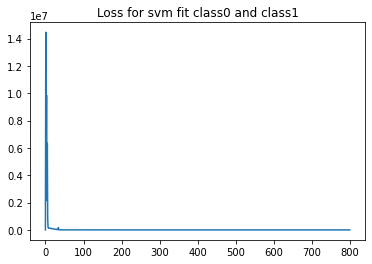

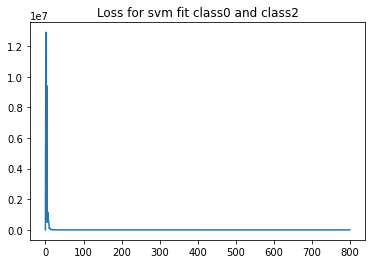

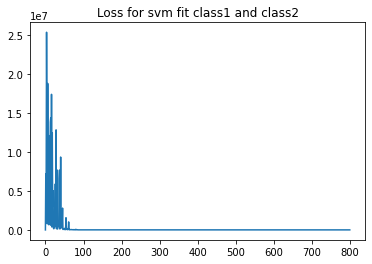

In [68]:
for i in range(len(classes)-1):
        for j in classes[i+1:]:
            plt.plot(classifiers[i][j]['loss'])
            plt.title(f'Loss for svm fit class{i} and class{j}')
            plt.show()

In [69]:
test_df = pd.read_csv('./Test/test.csv')

In [74]:
test_files = test_df.values
test_files

array([['1106.jpg'],
       ['2236.jpg'],
       ['1131.jpg'],
       ['2221.jpg'],
       ['2011.jpg'],
       ['2030.jpg'],
       ['2035.jpg'],
       ['1110.jpg'],
       ['1104.jpg'],
       ['2217.jpg'],
       ['1111.jpg'],
       ['1100.jpg'],
       ['1112.jpg'],
       ['1138.jpg'],
       ['2238.jpg'],
       ['2009.jpg'],
       ['2225.jpg'],
       ['2240.jpg'],
       ['2020.jpg'],
       ['2209.jpg'],
       ['2029.jpg'],
       ['1114.jpg'],
       ['2201.jpg'],
       ['1118.jpg'],
       ['2025.jpg'],
       ['2202.jpg'],
       ['1117.jpg'],
       ['1119.jpg'],
       ['2000.jpg'],
       ['2007.jpg'],
       ['2039.jpg'],
       ['2017.jpg'],
       ['2215.jpg'],
       ['1120.jpg'],
       ['2006.jpg'],
       ['1116.jpg'],
       ['1128.jpg'],
       ['1125.jpg'],
       ['2203.jpg'],
       ['1133.jpg'],
       ['1137.jpg'],
       ['2220.jpg'],
       ['2012.jpg'],
       ['2224.jpg'],
       ['2206.jpg'],
       ['1122.jpg'],
       ['2223.jpg'],
       ['1102

In [75]:
test_images = []

for file in test_files:
    path = Path('./Test/Images/'+file[0])
    img = image.load_img(path,target_size=(40,40))
    img = image.img_to_array(img)
    test_images.append(img)
    
test_images = np.array(test_images)

In [76]:
m = test_images.shape
test_images = test_images.reshape((m[0],-1))

In [80]:
class_pokemon_map = {}
for i,k in enumerate(pokemon_map.keys()):
    class_pokemon_map[i] = k

In [81]:
class_pokemon_map

{0: 'Bulbasaur', 1: 'Charmander', 2: 'Pikachu'}

In [82]:
predictions = []
for img in test_images:
    prediction = class_pokemon_map[predict(img)]
    predictions.append(prediction)
    
predictions = np.array(predictions)

In [85]:
df_data = np.concatenate((test_df.values,predictions.reshape((-1,1))),axis=1)

In [88]:
submission_df = pd.DataFrame(df_data,columns=['ImageId', 'NameOfPokemon'])

In [89]:
submission_df

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
...,...,...
118,1124.jpg,Bulbasaur
119,2014.jpg,Pikachu
120,2235.jpg,Charmander
121,1126.jpg,Bulbasaur


In [92]:
submission_df.to_csv('./my_submission.csv',index=False)